# Data-X Spring 2018: Homework 02

### Regression, Classification, Webscraping

**Authors:** Sana Iqbal (Part 1, 2, 3), Alexander Fred-Ojala (Extra Credit)


In this homework, you will do some exercises with prediction-classification, regression and web-scraping.


## Part 1


### Data:
__Data Source__:
Data file is uploaded to bCourses and is named: __Energy.csv__

The dataset was created by Angeliki Xifara ( Civil/Structural Engineer) and was processed by Athanasios Tsanas, Oxford Centre for Industrial and Applied Mathematics, University of Oxford, UK).

__Data Description__:

The dataset contains eight attributes of a building (or features, denoted by X1...X8) and response being the heating load on the building, y1. 

* X1	Relative Compactness 
* X2	Surface Area 
* X3	Wall Area 
*  X4	Roof Area 
*  X5	Overall Height 
* X6	Orientation 
*  X7	Glazing Area 
*  X8	Glazing Area Distribution 
*  y1	Heating Load 


#### Q1:Read the data file in python. Describe data features in terms of type, distribution range and mean values. Plot feature distributions.This step should give you clues about data sufficiency.

In [15]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np

X1    float64
X2    float64
X3    float64
X4    float64
X5    float64
X6      int64
X7    float64
X8      int64
Y1    float64
dtype: object
               X1          X2          X3          X4         X5          X6  \
count  768.000000  768.000000  768.000000  768.000000  768.00000  768.000000   
mean     0.764167  671.708333  318.500000  176.604167    5.25000    3.500000   
std      0.105777   88.086116   43.626481   45.165950    1.75114    1.118763   
min      0.620000  514.500000  245.000000  110.250000    3.50000    2.000000   
25%      0.682500  606.375000  294.000000  140.875000    3.50000    2.750000   
50%      0.750000  673.750000  318.500000  183.750000    5.25000    3.500000   
75%      0.830000  741.125000  343.000000  220.500000    7.00000    4.250000   
max      0.980000  808.500000  416.500000  220.500000    7.00000    5.000000   

               X7         X8          Y1  
count  768.000000  768.00000  768.000000  
mean     0.234375    2.81250   22.307201  
std      0

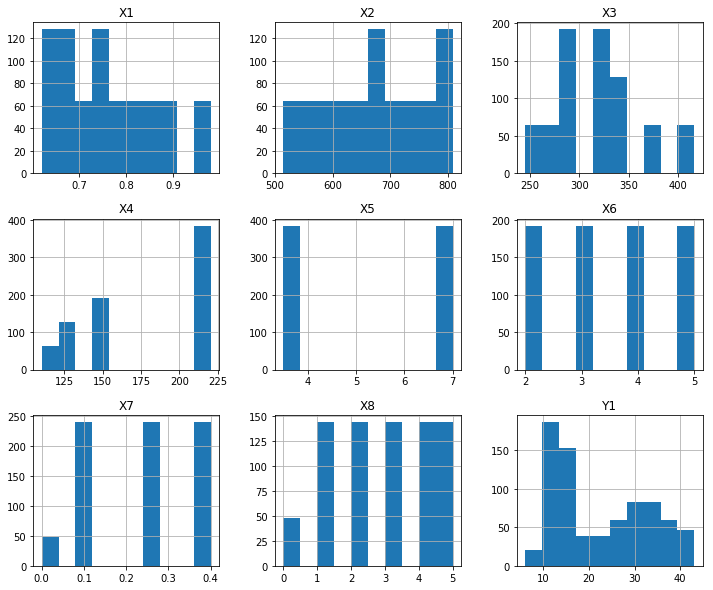

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

data=pd.read_csv('Energy.csv')
energydata=pd.DataFrame(data)
print(energydata.dtypes)
print(energydata.describe())
energydata.hist(figsize=(12,10))
plt.show()

 __REGRESSION__:
LABELS ARE CONTINUOUS VALUES.
Here the model is trained to predict a continuous value for each instance.
On inputting a feature vector into the model, the trained model is able to predict a continuous value  for  that instance.  

__Q2.1: Train a linear regression model on 85 percent of the given dataset, what is the intercept value and coefficient values.__



In [13]:
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split

energy_x = energydata.iloc[:,:-1]
energy_y = energydata['Y1']
print('number of total samples: ',len(energy_x))

xtrain, xtest, ytrain, ytest = train_test_split(energy_x, energy_y, test_size=0.15, random_state = 100)
print ('Number of samples in training data:',len(xtrain))
print ('Number of samples in validation data:',len(xtest))

reg=linear_model.LinearRegression(fit_intercept=True)
reg.fit(xtrain, ytrain)

ypred=reg.predict(xtest)
ypred1=reg.predict(xtrain)

print('\nCoefficients:\n ',reg.coef_)
print('\nIntercept: ',reg.intercept_)

number of total samples:  768
Number of samples in training data: 652
Number of samples in validation data: 116

Coefficients:
  [ -6.24938187e+01   1.14351200e+12  -1.14351200e+12  -2.28702401e+12
   4.32184148e+00   1.94553204e-02   2.00676946e+01   2.36007105e-01]

Intercept:  77.891702454



#### Q.2.2: Report model performance using 'ROOT MEAN SQUARE' error metric on:  
__1. Data that was used for training(Training error)__   
__2. On the 15 percent of unseen data (test error) __ 



In [6]:
from sklearn.metrics import mean_squared_error
from math import sqrt

print('1. RMSE train data: ',sqrt(mean_squared_error(ytrain, ypred1)))
print('2. RMSE test data: ',sqrt(mean_squared_error(ytest, ypred)))
acc_reglin=reg.score(xtest,ytest)
print('\nlinear regression naccuracy (%): ',acc_reglin*100)

1. RMSE train data:  2.93551172582705
2. RMSE test data:  2.885331133638931

linear regression naccuracy (%):  90.9952525941



__ Q2.3: Lets us see the effect of amount of data on the performance of prediction model.Use varying amounts of  Training data (100,200,300,400,500,all) to train regression models and report  training error and validation error in each case. Validation data/Test data   is the same as above for  all  these cases.__  

Plot error rates vs number of training examples.Comment on the relationshipyou observe in the plot, between the amount of data used to train the model and the validation accuracy of the model.

__Hint:__ Use array indexing to choose varying data amounts

[100, 200, 300, 400, 500, 652]
Number of samples in train data: 100
Number of samples in test data: 116
Training RMSE for 100 observations in training set: 2.92760482324
Test RMSE for 100 observations in training set: 3.05435382389
Number of samples in train data: 200
Number of samples in test data: 116
Training RMSE for 200 observations in training set: 2.94940507493
Test RMSE for 200 observations in training set: 2.89522452089
Number of samples in train data: 300
Number of samples in test data: 116
Training RMSE for 300 observations in training set: 3.03196105191
Test RMSE for 300 observations in training set: 2.9246707638
Number of samples in train data: 400
Number of samples in test data: 116
Training RMSE for 400 observations in training set: 2.93409921214
Test RMSE for 400 observations in training set: 2.88615665111
Number of samples in train data: 500
Number of samples in test data: 116
Training RMSE for 500 observations in training set: 3.00664352621
Test RMSE for 500 observati

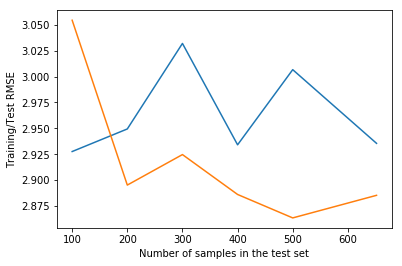



Observations from the plot:
1. Training RMSE wavers with increasing training observations.
2. Test RMSE in general decreases with increasing observations in the training set.
3. The training error being higher than test error means that the linear regression model accurately captures the trend in 
   the data. This can be seen in that the predictions made by this model on the test set are quite accurate and have low 
   errors/deviations from their actual values.
4. The test and train RMSE values are very close to each other indicating a good model.


In [20]:
'''traindata=[100,200,300,400,500,652]

n=[]
ytesterror=[]
ytrainerror=[]

for i,x in enumerate(traindata):
    xtrainpoints=xtrain[:x]
    ytrainpoints=ytrain[:x]
    n=np.append(n,x)
    print('no of training points: ',int(n[i]))
    print(len(xtrainpoints))
    reg=linear_model.LinearRegression()
    reg.fit(xtrainpoints, ytrainpoints)
    
    ypred=reg.predict(xtest)
    ypred1=reg.predict(xtrainpoints)
    
    a=mean_squared_error(ytrainpoints, ypred1)
    b=mean_squared_error(ytest, ypred)
    
    ytesterror=np.append(ytesterror,a)
    ytrainerror=np.append(ytrainerror,b)
    
    print('\n1.',x,'RMSE train data: ',a)
    print('2.',x,'RMSE test data: ',b)

plt.plot(n,ytesterror,n,ytrainerror)
plt.xlabel('no of training samples')
plt.ylabel('RMSE')

plt.show()'''

train_mse = list()
test_mse = list()
a = list([100,200,300,400,500,652])
print(a)

# Assuming error rate being talked about is RMSE and not error rate = 1 - accuracy

# 100 samples
# Splitting data 
x_train_100, x_test_100, y_train_100, y_test_100 = train_test_split(energy_x, energy_y, train_size = 100, test_size=0.15, random_state=100)
print ('Number of samples in train data:',len(x_train_100))
print ('Number of samples in test data:',len(x_test_100))

# Fitting the model
LinearRegressionModel_100= linear_model.LinearRegression()
LinearRegressionModel_100.fit(x_train_100, y_train_100)

# RMSE for training data
y_pred_train_100 = LinearRegressionModel_100.predict(x_train_100)
train_mse_100 = np.sqrt(np.mean((y_train_100-y_pred_train_100)**2))
print("Training RMSE for 100 observations in training set:",train_mse_100)
train_mse.append(train_mse_100)

# RMSE for test data
y_pred_test_100 = LinearRegressionModel_100.predict(x_test_100)
test_mse_100 = np.sqrt(np.mean((y_test_100-y_pred_test_100)**2))
print("Test RMSE for 100 observations in training set:", test_mse_100)
test_mse.append(test_mse_100)


# 200 samples
# Splitting data 
x_train_200, x_test_200, y_train_200, y_test_200 = train_test_split(energy_x, energy_y, train_size = 200, test_size=0.15, random_state=100)
print ('Number of samples in train data:',len(x_train_200))
print ('Number of samples in test data:',len(x_test_200))

# Fitting the model
LinearRegressionModel_200= linear_model.LinearRegression()
LinearRegressionModel_200.fit(x_train_200, y_train_200)

# RMSE for training data
y_pred_train_200 = LinearRegressionModel_200.predict(x_train_200)
train_mse_200 = np.sqrt(np.mean((y_train_200-y_pred_train_200)**2))
print("Training RMSE for 200 observations in training set:",train_mse_200)
train_mse.append(train_mse_200)

# RMSE for test data
y_pred_test_200 = LinearRegressionModel_200.predict(x_test_200)
test_mse_200 = np.sqrt(np.mean((y_test_200-y_pred_test_200)**2))
print("Test RMSE for 200 observations in training set:", test_mse_200)
test_mse.append(test_mse_200)


# 300 samples
# Splitting data 
x_train_300, x_test_300, y_train_300, y_test_300 = train_test_split(energy_x, energy_y, train_size = 300, test_size=0.15, random_state=100)
print ('Number of samples in train data:',len(x_train_300))
print ('Number of samples in test data:',len(x_test_300))

# Fitting the model
LinearRegressionModel_300= linear_model.LinearRegression()
LinearRegressionModel_300.fit(x_train_300, y_train_300)

# RMSE for training data
y_pred_train_300 = LinearRegressionModel_300.predict(x_train_300)
train_mse_300 = np.sqrt(np.mean((y_train_300-y_pred_train_300)**2))
print("Training RMSE for 300 observations in training set:",train_mse_300)
train_mse.append(train_mse_300)

# RMSE for test data
y_pred_test_300 = LinearRegressionModel_300.predict(x_test_300)
test_mse_300 = np.sqrt(np.mean((y_test_300-y_pred_test_300)**2))
print("Test RMSE for 300 observations in training set:", test_mse_300)
test_mse.append(test_mse_300)


# 400 samples
# Splitting data 
x_train_400, x_test_400, y_train_400, y_test_400 = train_test_split(energy_x, energy_y, train_size = 400, test_size=0.15, random_state=100)
print ('Number of samples in train data:',len(x_train_400))
print ('Number of samples in test data:',len(x_test_400))

# Fitting the model
LinearRegressionModel_400= linear_model.LinearRegression()
LinearRegressionModel_400.fit(x_train_400, y_train_400)

# RMSE for training data
y_pred_train_400 = LinearRegressionModel_400.predict(x_train_400)
train_mse_400 = np.sqrt(np.mean((y_train_400-y_pred_train_400)**2))
print("Training RMSE for 400 observations in training set:",train_mse_400)
train_mse.append(train_mse_400)

# RMSE for test data
y_pred_test_400 = LinearRegressionModel_400.predict(x_test_400)
test_mse_400 = np.sqrt(np.mean((y_test_400-y_pred_test_400)**2))
print("Test RMSE for 400 observations in training set:", test_mse_400)
test_mse.append(test_mse_400)


# 500 samples
# Splitting data 
x_train_500, x_test_500, y_train_500, y_test_500 = train_test_split(energy_x, energy_y, train_size = 500, test_size=0.15, random_state=100)
print ('Number of samples in train data:',len(x_train_500))
print ('Number of samples in test data:',len(x_test_500))

# Fitting the model
LinearRegressionModel_500= linear_model.LinearRegression()
LinearRegressionModel_500.fit(x_train_500, y_train_500)

# RMSE for training data
y_pred_train_500 = LinearRegressionModel_500.predict(x_train_500)
train_mse_500 = np.sqrt(np.mean((y_train_500-y_pred_train_500)**2))
print("Training RMSE for 500 observations in training set:",train_mse_500)
train_mse.append(train_mse_500)

# RMSE for test data
y_pred_test_500 = LinearRegressionModel_500.predict(x_test_500)
test_mse_500 = np.sqrt(np.mean((y_test_500-y_pred_test_500)**2))
print("Test RMSE for 500 observations in training set:", test_mse_500)
test_mse.append(test_mse_500)

# All samples
# Splitting data 
x_train_all, x_test_all, y_train_all, y_test_all = train_test_split(energy_x, energy_y, test_size=0.15, random_state=100)
print ('Number of samples in train data:',len(x_train_all))
print ('Number of samples in test data:',len(x_test_all))

# Fitting the model
LinearRegressionModel_all= linear_model.LinearRegression()
LinearRegressionModel_all.fit(x_train_all, y_train_all)

# RMSE for training data
y_pred_train_all = LinearRegressionModel_all.predict(x_train_all)
train_mse_all = np.sqrt(np.mean((y_train_all-y_pred_train_all)**2))
print("Training RMSE for all observations in training set:",train_mse_all)
train_mse.append(train_mse_all)

# RMSE for test data
y_pred_test_all = LinearRegressionModel_all.predict(x_test_all)
test_mse_all = np.sqrt(np.mean((y_test_all-y_pred_test_all)**2))
print("Test RMSE for all observations in training set:", test_mse_all)
test_mse.append(test_mse_all)

plt.plot(a,train_mse, label = 'train RMSE')
plt.plot(a,test_mse, label = "test RMSE");
#plt.legend(loc=3)
plt.xlabel("Number of samples in the test set")
plt.ylabel("Training/Test RMSE")
plt.show()

print('''\n\nObservations from the plot:
1. Training RMSE wavers with increasing training observations.
2. Test RMSE in general decreases with increasing observations in the training set.
3. The training error being higher than test error means that the linear regression model accurately captures the trend in 
   the data. This can be seen in that the predictions made by this model on the test set are quite accurate and have low 
   errors/deviations from their actual values.
4. The test and train RMSE values are very close to each other indicating a good model.''')

In [21]:
## IGNORE

'''import numpy as np
#np.random.seed(100)

xtrain1=xtrain[:100]            # error becomes very large when I choose random samples - xtrain.sample(100). why??
xtrain2=xtrain[:200]
xtrain3=xtrain[:300]
xtrain4=xtrain[:400]
xtrain5=xtrain[:500]
ytrain1=ytrain[:100]
ytrain2=ytrain[:200]
ytrain3=ytrain[:300]
ytrain4=ytrain[:400]
ytrain5=ytrain[:500]
print(xtrain1.head())
print(xtrain2.head())

reg1=linear_model.LinearRegression()
reg1.fit(xtrain1, ytrain1)

ypred1=reg1.predict(xtest)
ypred11=reg1.predict(xtrain1)

print('1. 100 RMSE train data: ',sqrt(mean_squared_error(ytrain1, ypred11)))
print('2. 100 RMSE test data: ',sqrt(mean_squared_error(ytest, ypred1)))

reg2=linear_model.LinearRegression()
reg.fit(xtrain2, ytrain2)

ypred2=reg.predict(xtest)
ypred12=reg.predict(xtrain2)

print('\n1. 200 RMSE train data: ',sqrt(mean_squared_error(ytrain2, ypred12)))
print('2. 200 RMSE test data: ',sqrt(mean_squared_error(ytest, ypred2)))

reg3=linear_model.LinearRegression()
reg.fit(xtrain3, ytrain3)

ypred3=reg.predict(xtest)
ypred13=reg.predict(xtrain3)

print('\n1. 300 RMSE train data: ',sqrt(mean_squared_error(ytrain3, ypred13))
print('2. 300 RMSE test data: ',sqrt(mean_squared_error(ytest, ypred3)))

reg4=linear_model.LinearRegression()
reg.fit(xtrain4, ytrain4)

ypred4=reg.predict(xtest)
ypred14=reg.predict(xtrain4)

print('\n1. 400 RMSE train data: ',sqrt(mean_squared_error(ytrain4, ypred14)))
print('2. 400 RMSE test data: ',sqrt(mean_squared_error(ytest, ypred4)))

reg5=linear_model.LinearRegression()
reg.fit(xtrain5, ytrain5)

ypred5=reg.predict(xtest)
ypred15=reg.predict(xtrain5)

print('\n1. 500 RMSE train data: ',sqrt(mean_squared_error(ytrain5, ypred15)))
print('2. 500 RMSE test data: ',sqrt(mean_squared_error(ytest, ypred5)))

print('\nerror for all data is same as in previous part')'''

"import numpy as np\n#np.random.seed(100)\n\nxtrain1=xtrain[:100]            # error becomes very large when I choose random samples - xtrain.sample(100). why??\nxtrain2=xtrain[:200]\nxtrain3=xtrain[:300]\nxtrain4=xtrain[:400]\nxtrain5=xtrain[:500]\nytrain1=ytrain[:100]\nytrain2=ytrain[:200]\nytrain3=ytrain[:300]\nytrain4=ytrain[:400]\nytrain5=ytrain[:500]\nprint(xtrain1.head())\nprint(xtrain2.head())\n\nreg1=linear_model.LinearRegression()\nreg1.fit(xtrain1, ytrain1)\n\nypred1=reg1.predict(xtest)\nypred11=reg1.predict(xtrain1)\n\nprint('1. 100 RMSE train data: ',sqrt(mean_squared_error(ytrain1, ypred11)))\nprint('2. 100 RMSE test data: ',sqrt(mean_squared_error(ytest, ypred1)))\n\nreg2=linear_model.LinearRegression()\nreg.fit(xtrain2, ytrain2)\n\nypred2=reg.predict(xtest)\nypred12=reg.predict(xtrain2)\n\nprint('\n1. 200 RMSE train data: ',sqrt(mean_squared_error(ytrain2, ypred12)))\nprint('2. 200 RMSE test data: ',sqrt(mean_squared_error(ytest, ypred2)))\n\nreg3=linear_model.LinearReg


__CLASSIFICATION__:
LABELS ARE DISCRETE VALUES.
Here the model is trained to classify each instance into a set of predefined  discrete classes.
On inputting a feature vector into the model, the trained model is able to predict a  class of that instance. You can also output the probabilities of an instance belnging to a class.  

__ Q 3.1:  Bucket values of 'y1' i.e 'Heating Load'  from the original dataset into 3 classes:__ 

0: 'Low' ( < 15),   
1: 'Medium'  (15-30),   
2: 'High'  (>30)

This converts the given dataset  into a classification problem, classes being, Heating load is: *low, medium or high*. Use this datset with transformed 'heating load' for creating a  logistic regression classifiction model that predicts heating load type of a building. Use test-train split ratio of 0.15.  

*Report training and test accuracies and  confusion matrices.*


**HINT:** Use pandas.cut

In [27]:
energydata['Heating Load']=pd.cut(energydata['Y1'],bins=[0,15,30,45],labels=['Low','Medium','High'])
energydata=energydata.drop('Y1',axis=1)
energydata.head()       #energydata['Heating Load'].unique to chech values of bands


,X1,X2,X3,X4,X5,X6,X7,X8,Heating Load
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,Medium
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,Medium
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,Medium
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,Medium
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,Medium


In [37]:
from sklearn.linear_model import LogisticRegression

energy1x=energydata.iloc[:,:-1]
energy1y=energydata['Heating Load'].map({'Low': 0, 'Medium': 1,'High' :2})
xtrain, xtest, ytrain, ytest = train_test_split(energy1x, energy1y, test_size=0.15, random_state = 100)

logreg=LogisticRegression()
logreg.fit(xtrain,ytrain)
Ypred=logreg.predict(xtest)
acc_train=logreg.score(xtrain,ytrain)
acc_test=logreg.score(xtest,ytest)
print('Logistic Regression accuracy for train data: ',acc_train,'and for test data: ',acc_test)

#acc_log = sum(Ypred == ytest)/len(ytest)*100
#print('Scikit Model score: ',acc_log)

# CONFUSION MATRIX

from sklearn.metrics import confusion_matrix
y_true_train=ytrain
y_pred_train=logreg.predict(xtrain)
ConfusionMatrix=pd.DataFrame(confusion_matrix(y_true_train, y_pred_train), \
                             columns=['Predicted 0','Predicted 1','Predicted 2'],index=['Actual 0','Actual 1','Actual 2'])
print ('Confusion matrix of train data is: \n',ConfusionMatrix)

y_true_test=ytest
y_pred_test=logreg.predict(xtest)
ConfusionMatrix1=pd.DataFrame(confusion_matrix(y_true_test, y_pred_test), \
                             columns=['Predicted 0','Predicted 1','Predicted 2'],index=['Actual 0','Actual 1','Actual 2'])
print ('Confusion matrix of test data is: \n',ConfusionMatrix1)

Logistic Regression accuracy for train data:  0.773006134969 and for test data:  0.76724137931
Confusion matrix of train data is: 
           Predicted 0  Predicted 1  Predicted 2
Actual 0          244            1            0
Actual 1           71          120           41
Actual 2            0           35          140
Confusion matrix of test data is: 
           Predicted 0  Predicted 1  Predicted 2
Actual 0           40            0            0
Actual 1           12           29            9
Actual 2            0            6           20


__ Q2.2: One of the preprocessing steps in Data science is Feature Scaling i.e getting all our data on the same scale by setting same  Min-Max of feature values. This makes training less sensitive to the scale of features . Scaling is important in algorithms that use distance based classification, SVM or K means or involve gradient descent optimization.If we  Scale features in the range [0,1] it is called unity based normalization.__

__Perform unity based normalization on the above dataset and train the model again, compare model performance in training and validation with your previous model.__  

refer:http://scikit-learn.org/stable/modules/preprocessing.html#preprocessing-scaler  
more at: https://en.wikipedia.org/wiki/Feature_scaling

In [50]:
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler

min_max_scaler = preprocessing.MinMaxScaler()    
print(min_max_scaler)

energy_x = energydata.iloc[:,:-1]
energy_y = energydata['Heating Load'].map({'Low': 0, 'Medium': 1,'High' :2})
xtrain, xtest, ytrain, ytest = train_test_split(energy_x, energy_y, test_size=0.15, random_state = 100)

x_train_scaled = min_max_scaler.fit_transform(xtrain)
x_test_scaled = min_max_scaler.fit_transform(xtest)

print("\n Sample row from actual train values:\n", xtrain[0:1][:])
print("\n Scaled values of the same row:\n", x_train_scaled[0:1][:])
print("\n Sample row from actual test values:\n", xtest[0:1][:])
print("\n Scaled values of the test values\n", x_test_scaled[0:1][:])

Logreg_scaled = linear_model.LogisticRegression()
Logreg_scaled.fit(x_train_scaled, ytrain)

training_accuracy_scaled=Logreg_scaled.score(x_train_scaled,ytrain)
print ('Training accuracy for scaled features:',training_accuracy_scaled)

test_accuracy_scaled=Logreg_scaled.score(x_test_scaled,ytest)
print('Accuracy of the model on test data: ',test_accuracy_scaled)
print('\nmodel improves after scaling')
#minmax=MinMaxScaler().fit(xtrain)
#scaled_xtrain=minmax.transform(xtrain)
#scaled_ytrain=minmax.fit_transform(ytrain.values.reshape(-1,1))
#scaled_xtest=minmax.transform(xtest)
#scaled_ytest=minmax.fit_transform(ytest.values.reshape(-1,1))


MinMaxScaler(copy=True, feature_range=(0, 1))

 Sample row from actual train values:
        X1     X2     X3     X4   X5  X6    X7  X8
458  0.74  686.0  245.0  220.5  3.5   4  0.25   4

 Scaled values of the same row:
 [[ 0.33333333  0.58333333  0.          1.          0.          0.66666667
   0.625       0.8       ]]

 Sample row from actual test values:
        X1     X2     X3     X4   X5  X6   X7  X8
173  0.71  710.5  269.5  220.5  3.5   3  0.1   3

 Scaled values of the test values
 [[ 0.25        0.66666667  0.14285714  1.          0.          0.33333333
   0.25        0.6       ]]
Training accuracy for scaled features: 0.799079754601
Accuracy of the model on test data:  0.784482758621

model improves after scaling


## Part 2



__ 1. Read __`diabetesdata.csv`__ file into a pandas dataframe. Analyze the data features, check for NaN values. 
About the data: __

1. __TimesPregnant__: Number of times pregnant 
2. __glucoseLevel__: Plasma glucose concentration a 2 hours in an oral glucose tolerance test 
3. __BP__: Diastolic blood pressure (mm Hg)  
5. __insulin__: 2-Hour serum insulin (mu U/ml) 
6. __BMI__: Body mass index (weight in kg/(height in m)^2) 
7. __pedigree__: Diabetes pedigree function 
8. __Age__: Age (years) 
9. __IsDiabetic__: 0 if not diabetic or 1 if diabetic) 

__ 2. Preprocess data to replace NaN values in a feature(if any) using mean of the feature.  
Train  logistic regression, SVM, perceptron, kNN, xgboost and random forest models using this preprocessed data with 20% test split.Report training and test accuracies.__







   TimesPregnant  glucoseLevel  BP  insulin   BMI  Pedigree        Age  \
0              6    148.000000  72        0  33.6     0.627  50.000000   
1              1    121.016349  66        0  26.6     0.351  31.000000   
2              8    183.000000  64        0  23.3     0.672  33.353741   
3              1    121.016349  66       94  28.1     0.167  21.000000   
4              0    137.000000  40      168  43.1     2.288  33.000000   

   IsDiabetic  
0           1  
1           0  
2           1  
3           0  
4           1  


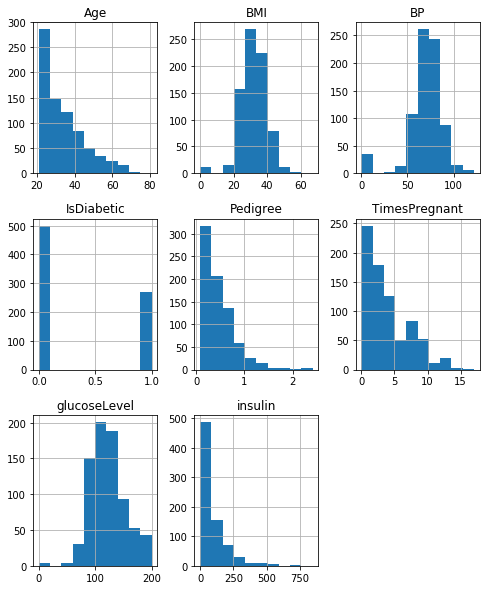

In [53]:
data=pd.read_csv('diabetesdata.csv')
diabetes=pd.DataFrame(data)
diabetes1=diabetes.fillna(diabetes.mean())
print(diabetes1.head())
diabetes1.hist(figsize=(8,10))
plt.show()

In [54]:
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split

diabetes_x=diabetes1.iloc[:,:-1]
diabetes_y=diabetes['IsDiabetic']
#diabetes_y=diabetes_y.to_frame('IsDiabetic')
xtrain,xtest,ytrain,ytest=train_test_split(diabetes_x,diabetes_y,test_size=0.2,random_state=100)

In [58]:
#  LOGISTIC REGRESSION

from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression()
logreg.fit(xtrain,ytrain)
ypred=logreg.predict(xtest)
print('no. of correct predictions: ',sum(ypred==ytest),'/',len(xtest))
trainacc=logreg.score(xtrain,ytrain)
accuracy=logreg.score(xtest,ytest)
print('Logistic Regression Accuracy for test data: ',str(round(accuracy,2)*100),'% and fo rtrain data: ',str(round(trainacc,2)*100))

no. of correct predictions:  113 / 154
Logistic Regression Accuracy for test data:  73.0 % and fo rtrain data:  78.0


In [59]:
#  SVM

from sklearn.svm import SVC, LinearSVC
svc=SVC()
svc.fit(xtrain,ytrain)
ypred=svc.predict(xtest)
print('no. of correct predictions: ',sum(ypred==ytest),'/',len(xtest))
trainacc=svc.score(xtrain,ytrain)
accuracy=svc.score(xtest,ytest)
print('Logistic Regression Accuracy for test data: ',str(round(accuracy,2)*100),'% and fo rtrain data: ',str(round(trainacc,2)*100))

no. of correct predictions:  101 / 154
Logistic Regression Accuracy for test data:  66.0 % and fo rtrain data:  100.0


In [60]:
#  PERCEPTRON

from sklearn.linear_model import Perceptron
per=Perceptron()
per.fit(xtrain,ytrain)
ypred=per.predict(xtest)
print('no. of correct predictions: ',sum(ypred==ytest),'/',len(xtest))
trainacc=per.score(xtrain,ytrain)
accuracy=per.score(xtest,ytest)
print('Logistic Regression Accuracy for test data: ',str(round(accuracy,2)*100),'% and fo rtrain data: ',str(round(trainacc,2)*100))

no. of correct predictions:  99 / 154
Logistic Regression Accuracy for test data:  64.0 % and fo rtrain data:  64.0


In [61]:
#  KNN

from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=2)
knn.fit(xtrain,ytrain)
ypred=knn.predict(xtest)
print('no. of correct predictions: ',sum(ypred==ytest),'/',len(xtest))
trainacc=knn.score(xtrain,ytrain)
accuracy=knn.score(xtest,ytest)
print('Logistic Regression Accuracy for test data: ',str(round(accuracy,2)*100),'% and fo rtrain data: ',str(round(trainacc,2)*100))

no. of correct predictions:  110 / 154
Logistic Regression Accuracy for test data:  71.0 % and fo rtrain data:  85.0


In [63]:
#  XGBOOST

import xgboost as xgb
gradboost=xgb.XGBClassifier(n_estimators=1000)
gradboost.fit(xtrain,ytrain)
ypred=gradboost.predict(xtest)
print('no. of correct predictions: ',sum(ypred==ytest),'/',len(xtest))
trainacc=gradboost.score(xtrain,ytrain)
accuracy=gradboost.score(xtest,ytest)
print('Logistic Regression Accuracy for test data: ',str(round(accuracy,2)*100),'% and fo rtrain data: ',str(round(trainacc,2)*100))

no. of correct predictions:  111 / 154
Logistic Regression Accuracy for test data:  72.0 % and fo rtrain data:  100.0


In [62]:
#  RANDOM FOREST

from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=1000)
rf.fit(xtrain,ytrain)
ypred=rf.predict(xtest)
print('no. of correct predictions: ',sum(ypred==ytest),'/',len(xtest))
trainacc=rf.score(xtrain,ytrain)
accuracy=rf.score(xtest,ytest)
print('Logistic Regression Accuracy for test data: ',str(round(accuracy,2)*100),'% and fo rtrain data: ',str(round(trainacc,2)*100))

no. of correct predictions:  108 / 154
Logistic Regression Accuracy for test data:  70.0 % and fo rtrain data:  100.0




__3. What is the  ratio of diabetic persons in 3 equirange bands of 'BMI' and 'Pedigree' in the provided dataset.__

 __Convert these features - 'BP','insulin','BMI' and 'Pedigree'   into categorical values by mapping different bands of values of these features to integers 0,1,2.__  
 
HINT: USE pd.cut with bin=3 to create 3 bins






In [69]:
X_BP = pd.cut(diabetes["BP"],bins=3,labels = ["Low", "Medium", "High"]) 
X_BP=X_BP.map({'Low': 0, 'Medium': 1,'High' :2})
diabetes['BP_cat'] = X_BP

X_insulin = pd.cut(diabetes["insulin"],bins=3,labels = ["Low", "Medium", "High"])
X_insulin=X_insulin.map({'Low': 0, 'Medium': 1,'High' :2})
diabetes['insulin_cat'] = X_insulin

X_BMI = pd.cut(diabetes["BMI"],bins=3,labels = ["Low", "Medium", "High"])
X_BMI=X_BMI.map({'Low': 0, 'Medium': 1,'High' :2})
diabetes['BMI_cat'] = X_BMI

X_Pedigree = pd.cut(diabetes["Pedigree"],bins=3,labels = ["Low", "Medium", "High"])
X_Pedigree=X_Pedigree.map({'Low': 0, 'Medium': 1,'High' :2})
diabetes['Pedigree_cat'] = X_Pedigree

tab1 = pd.crosstab(diabetes["BMI_cat"], diabetes["IsDiabetic"])
print(tab1)
tab2 = pd.crosstab(diabetes["Pedigree_cat"],diabetes["IsDiabetic"])
print(tab2)
ratio1 = pd.Series([2/268, 244/268, 22/268]) 
tab1["Ratio of diabetics by BMI"]=ratio1
print(tab1)
ratio2 = pd.Series([224/268, 40/268, 4/268])
tab2["Ratio of diabetics by Pedigree"] = ratio2
print(tab2)
ratio_df = pd.concat([tab1["Ratio of diabetics by BMI"],tab2["Ratio of diabetics by Pedigree"]], axis = 1)

ratio_df

IsDiabetic    0    1
BMI_cat             
0            49    2
1           437  244
2            14   22
IsDiabetic      0    1
Pedigree_cat          
0             461  224
1              34   40
2               5    4
IsDiabetic    0    1  Ratio of diabetics by BMI
BMI_cat                                        
0            49    2                   0.007463
1           437  244                   0.910448
2            14   22                   0.082090
IsDiabetic      0    1  Ratio of diabetics by Pedigree
Pedigree_cat                                          
0             461  224                        0.835821
1              34   40                        0.149254
2               5    4                        0.014925


,Ratio of diabetics by BMI,Ratio of diabetics by Pedigree
0,0.007463,0.835821
1,0.910448,0.149254
2,0.082090,0.014925



__4. Now consider the original dataset again, instead of generalizing the NAN values with the mean of the feature we will try assigning values to NANs based on some hypothesis. For example for age we assume that the relation between BMI and BP of people is a reflection of the age group.We can have 9 types of BMI and BP relations and our aim is to find the median age of each of that group:__

Your Age guess matrix will look like this:  

| BMI | 0       | 1      | 2  |
|-----|-------------|------------- |----- |
| BP  |             |              |      |
| 0   | a00         | a01          | a02  |
| 1   | a10         | a11          | a12  |
| 2   | a20         | a21          |  a22 |


__Create a guess_matrix  for NaN values of *'Age'* ( using 'BMI' and 'BP')  and  *'glucoseLevel'*  (using 'BP' and 'Pedigree') for the given dataset and assign values accordingly to the NaNs in 'Age' or *'glucoseLevel'* .__


Refer to how we guessed age in the titanic notebook in the class.



In [70]:
# Reading the data as a new file
diabetes2 = pd.read_csv("diabetesdata.csv")
print(diabetes2.head())
print("\n",diabetes2.isnull().sum())

# Converting features to categorical variables
X_BP = pd.cut(diabetes2["BP"],bins=3,labels = ["Low", "Medium", "High"]) 
X_BP=X_BP.map({'Low': 0, 'Medium': 1,'High' :2})
diabetes2['BP_cat'] = X_BP

X_BMI = pd.cut(diabetes2["BMI"],bins=3,labels = ["Low", "Medium", "High"])
X_BMI=X_BMI.map({'Low': 0, 'Medium': 1,'High' :2})
diabetes2['BMI_cat'] = X_BMI

X_Pedigree = pd.cut(diabetes2["Pedigree"],bins=3,labels = ["Low", "Medium", "High"])
X_Pedigree=X_Pedigree.map({'Low': 0, 'Medium': 1,'High' :2})
diabetes2['Pedigree_cat'] = X_Pedigree

X_insulin = pd.cut(diabetes2["insulin"],bins=3,labels = ["Low", "Medium", "High"])
X_insulin=X_insulin.map({'Low': 0, 'Medium': 1,'High' :2})
diabetes2['insulin_cat'] = X_insulin

# Initiating our age guess table
guess_ages = np.zeros((3,3),dtype=int)
print("\n",guess_ages)

# Forming the age guess table and modifying the diabetes2 dataframe to fill median values
for i in range(0, 3):
        for j in range(0,3):
            guess_df = diabetes2[(diabetes2['BP_cat'] == i) \
                        &(diabetes2['BMI_cat'] == j)]['Age'].dropna()

            # Extract the median age for this group
            # (less sensitive) to outliers
            age_guess = guess_df.median()
          
            # Convert random age float to int
            guess_ages[i,j] = int(age_guess)
    
            
print('Guess_Age table:\n',guess_ages)
print ('\nAssigning age values to NAN age values in the dataset...')
    
for i in range(0, 3):
    for j in range(0, 3):
        diabetes2.loc[ (diabetes2.Age.isnull()) & (diabetes2.BP_cat == i) \
                    & (diabetes.BMI_cat == j),'Age'] = guess_ages[i,j]
                    

diabetes2['Age'] = diabetes2['Age'].astype(int)
print()

# Initiating our glucose guess table
guess_glucose = np.zeros((3,3),dtype=int)
print("\n",guess_glucose)

# Forming the glucose guess table and modifying the diabetes2 dataframe to fill median values
for i in range(0, 3):
        for j in range(0,3):
            guess_df2 = diabetes2[(diabetes2['Pedigree_cat'] == i) \
                        &(diabetes2['BP_cat'] == j)]['glucoseLevel'].dropna()

            # Extract the median age for this group
            # (less sensitive) to outliers
            glucose_guess = guess_df2.median()
          
            # Convert random age float to int
            guess_glucose[i,j] = int(glucose_guess)
    
            
print('Guess_Glucose table:\n',guess_glucose)
print ('\nAssigning glucose values to NAN age values in the dataset...')
    
for i in range(0, 3):
    for j in range(0, 3):
        diabetes2.loc[ (diabetes2.glucoseLevel.isnull()) & (diabetes2.Pedigree_cat == i) \
                    & (diabetes.BP_cat == j),'glucoseLevel'] = guess_glucose[i,j]
                    

diabetes2['glucoseLevel'] = diabetes2['glucoseLevel'].astype(int)
print()
diabetes2.head()

   TimesPregnant  glucoseLevel  BP  insulin   BMI  Pedigree   Age  IsDiabetic
0              6         148.0  72        0  33.6     0.627  50.0           1
1              1           NaN  66        0  26.6     0.351  31.0           0
2              8         183.0  64        0  23.3     0.672   NaN           1
3              1           NaN  66       94  28.1     0.167  21.0           0
4              0         137.0  40      168  43.1     2.288  33.0           1

 TimesPregnant     0
glucoseLevel     34
BP                0
insulin           0
BMI               0
Pedigree          0
Age              33
IsDiabetic        0
dtype: int64

 [[0 0 0]
 [0 0 0]
 [0 0 0]]
Guess_Age table:
 [[24 29 33]
 [25 29 32]
 [55 37 31]]

Assigning age values to NAN age values in the dataset...


 [[0 0 0]
 [0 0 0]
 [0 0 0]]
Guess_Glucose table:
 [[115 112 133]
 [127 115 129]
 [137 149 159]]

Assigning glucose values to NAN age values in the dataset...



,TimesPregnant,glucoseLevel,BP,insulin,BMI,Pedigree,Age,IsDiabetic,BP_cat,BMI_cat,Pedigree_cat,insulin_cat
0,6,148,72,0,33.6,0.627,50,1,1,1,0,0
1,1,112,66,0,26.6,0.351,31,0,1,1,0,0
2,8,183,64,0,23.3,0.672,29,1,1,1,0,0
3,1,112,66,94,28.1,0.167,21,0,1,1,0,0
4,0,137,40,168,43.1,2.288,33,1,0,1,2,0


In [71]:
age_df = pd.DataFrame(guess_ages)

columns = [("BMI_cat",0),("BMI_cat",1),("BMI_cat",2)]
age_df.columns = pd.MultiIndex.from_tuples(columns)

index = [("BP_cat",0),("BP_cat",1),("BP_cat",2)]
age_df.index = pd.MultiIndex.from_tuples(index)
print("The guess matrix for age as a dataframe is shown below:\n")
print(age_df)


glucose_df = pd.DataFrame(guess_glucose)

columns2 = [("BP_cat",0),("BP_cat",1),("BP_cat",2)]
glucose_df.columns = pd.MultiIndex.from_tuples(columns2)

index2 = [("Pedigree_cat",0),("Pedigree_cat",1),("Pedigree_cat",2)]
glucose_df.index = pd.MultiIndex.from_tuples(index2)
print("The guess matrix for glucose as a dataframe is shown below:\n")
glucose_df


The guess matrix for age as a dataframe is shown below:

         BMI_cat        
               0   1   2
BP_cat 0      24  29  33
       1      25  29  32
       2      55  37  31
The guess matrix for glucose as a dataframe is shown below:



BP_cat          
                    0    1    2
Pedigree_cat 0    115  112  133
             1    127  115  129
             2    137  149  159



__5. Now, convert 'glucoseLevel' and 'Age' features also to categorical variables of 5 categories each.__

__Use this dataset (with all features in categorical form) to train perceptron, logistic regression and random forest models using 20% test split. Report training and test accuracies.__







In [72]:

# Converting glucose and age into categorical variables of 5 categories each
X_glucose = pd.cut(diabetes2["glucoseLevel"],bins=5,labels = ["Lowest", "Lower", "Medium", "Higher", "Highest"])
X_glucose=X_glucose.map({'Lowest': 0, 'Lower': 1,'Medium' :2, 'Higher':3, 'Highest':4})
diabetes2['glucoseLevel_cat'] = X_glucose

X_age = pd.cut(diabetes2["Age"],bins=5,labels = ["Lowest", "Lower", "Medium", "Higher", "Highest"])
X_age=X_age.map({'Lowest': 0, 'Lower': 1,'Medium' :2, 'Higher':3, 'Highest':4})
diabetes2['Age_cat'] = X_age


diabetes2.drop("glucoseLevel",axis=1, inplace=True)
diabetes2.drop("BP",axis=1, inplace=True)
diabetes2.drop("insulin",axis=1, inplace=True)
diabetes2.drop("BMI",axis=1, inplace=True)
diabetes2.drop("Pedigree",axis=1, inplace=True)
diabetes2.drop("Age",axis=1, inplace=True)

diabetes2.head()



,TimesPregnant,IsDiabetic,BP_cat,BMI_cat,Pedigree_cat,insulin_cat,glucoseLevel_cat,Age_cat
0,6,1,1,1,0,0,3,2
1,1,0,1,1,0,0,2,0
2,8,1,1,1,0,0,4,0
3,1,0,1,1,0,0,2,0
4,0,1,0,1,2,0,3,0


In [73]:
# Applying various ML methods

# Getting features and response from the data as 2 separate dataframes
X=diabetes2.loc[:,["TimesPregnant","BP_cat","BMI_cat", "Pedigree_cat","insulin_cat","glucoseLevel_cat","Age_cat"]]
print(X.head())

Y=diabetes2['IsDiabetic']
print("\n\n",Y.head())

# Splitting the data set
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=100)
print('Number of samples in training data:',len(x_train))
print('Number of samples in validation data:',len(x_test))

print('''\n Use this dataset (with all features in categorical form) to train perceptron,
logistic regression and random forest models using 20% test split. Report training and test accuracies..''')



# Logistic regression
logreg = LogisticRegression() 
logreg.fit(x_train, y_train) 

# Training accuracy
training_accuracy_logistic=logreg.score(x_train,y_train)
print ('\n Training accuracy for logistic regression:',training_accuracy_logistic)

# Test accuracy
test_accuracy_logistic=logreg.score(x_test,y_test)
print('Test accuracy for logistic regression: ', test_accuracy_logistic)


# Perceptron
perceptron = Perceptron()
perceptron.fit(x_train, y_train)

# Training accuracy
training_accuracy_perceptron=perceptron.score(x_train,y_train)
print ('\n Training accuracy for perceptron:',training_accuracy_perceptron)

# Test accuracy
test_accuracy_perceptron=perceptron.score(x_test,y_test)
print('Test accuracy for perceptron: ', test_accuracy_perceptron)



# Random Forest
random_forest = RandomForestClassifier(n_estimators=1000)
random_forest.fit(x_train, y_train)

# Training accuracy
training_accuracy_rf=random_forest.score(x_train,y_train)
print ('\n Training accuracy for Random Forest:',training_accuracy_rf)

# Test accuracy
test_accuracy_rf=random_forest.score(x_test,y_test)
print('Test accuracy for Random Forest: ', test_accuracy_rf)

diabetes2.head()

   TimesPregnant  BP_cat  BMI_cat  Pedigree_cat  insulin_cat  \
0              6       1        1             0            0   
1              1       1        1             0            0   
2              8       1        1             0            0   
3              1       1        1             0            0   
4              0       0        1             2            0   

   glucoseLevel_cat  Age_cat  
0                 3        2  
1                 2        0  
2                 4        0  
3                 2        0  
4                 3        0  


 0    1
1    0
2    1
3    0
4    1
Name: IsDiabetic, dtype: int64
Number of samples in training data: 614
Number of samples in validation data: 154

 Use this dataset (with all features in categorical form) to train perceptron,
logistic regression and random forest models using 20% test split. Report training and test accuracies..

 Training accuracy for logistic regression: 0.768729641694
Test accuracy for logistic regres

,TimesPregnant,IsDiabetic,BP_cat,BMI_cat,Pedigree_cat,insulin_cat,glucoseLevel_cat,Age_cat
0,6,1,1,1,0,0,3,2
1,1,0,1,1,0,0,2,0
2,8,1,1,1,0,0,4,0
3,1,0,1,1,0,0,2,0
4,0,1,0,1,2,0,3,0


### Part 3

1. __Derive the expression for the optimal parameters in the linear regression equation, i.e. solve the normal equation for Ordinary Least Squares for the case of Simple Linear Regression, when we only have one input and one output__

Given a set of _n_ points $(X_i,Y_i)$ where $Yi$ is dependent on $Xi$ by a linear relation,  find the best-fit line,$$Z_i = {aX_i + b}$$  that minimizes the __sum of squared errors in Y__,i.e: $$minimize \sum_{i}{(Y_i- Z_i)^2}$$
__i. __ Show that $$ intercept \quad b = \overline{Y}-  a.\overline{X}\quad  and   \quad slope \quad a= \frac{\sum_{i}(X_i- \overline{X})(Y_i- \overline{Y})^2}{ \sum_{i}(X_i- \overline{X})}$$


 where $\overline{X}$ and  $\overline{Y}$ are the averages of the X values and the Y values, respectively.
 
__ ii. __Show that slope _a_ can be written as $ a = r.(S_y /S_x)$ where $S_y$  = the standard deviation of the Y values and $S_x$= the standard deviation of the X values and _r_ is the correlation coefficient.

##### Please try to write a nice LateXed version of your answer, and do the derivations of the expressions as nicely as possible


_____


i. For least squares regression, the sum of the squares of the errors is minimized. Using calculus, we can find equations for the parameters a and b that minimize the sum of the squared errors, S.

$\min  S = \displaystyle\min \sum\limits_{i=1}^n \left(e_i \right)^2= \min \sum \left(Y_i - Z_i \right)^2= \min \sum \left(Y_i - b - aX_i\right)^2$

We want to find b and a that minimize the sum, S. We start by taking the partial derivative of S with respect to b and setting it to zero: 

$\displaystyle\frac{\partial{S}}{\partial{b}} = -2 \sum \left(Y_i - b - aX_i\right) = 0$

$=>\displaystyle\sum \left(Y_i - b - aX_i\right) = 0$

$=>\displaystyle\sum b = \sum Y_i -a \sum X_i$

$=>\displaystyle nb = \sum Y_i -a\sum X_i$

$=>\displaystyle b = \frac{1}{n}\sum Y_i - a \frac{1}{n}\sum X_i $ 

Let's call the above as equation 1

$=>\displaystyle b = \bar Y - a . \bar X  $

where $\bar Y$ and $\bar X$ are the averages of the X values and Y values respectively. This completes the derivation of the
intercept.

Before taking partial derivative of S with respect to a, substitute the previous result for b in the equation for S

$\displaystyle \min S = \min \sum \left[Y_i-\left(\bar Y-a\bar X \right)-aX_i\right]^{2}=\min \sum \left[\left(Y_i-\bar Y\right)-a\left(X_i-\bar X\right)\right]^{2}$

Now, taking the partial derivative of S with respect to a and setting it to zero:

$\displaystyle \frac{\partial{S}}{\partial{b}} = -2\sum \left[\left(Y_i-\bar Y\right)-a\left(X_i-\bar X\right)\right]\left(X_i-{\bar X}\right)=0$

$=>\displaystyle \sum \left(Y_i-\bar Y\right)\left(X_i-\bar X\right)-a\sum \left(X_i-\bar X\right)^{2}=0$

$=>\displaystyle a = \frac {\sum \left(X_i-\bar X\right)\left(Y_i-\bar Y\right)}{\sum \left(X_i-\bar X\right)^{2}}$

This completes the derivation of the slope.

ii. We can divide the numerator and the denominator in the above equation obtained for slope by n to get the following equation:

$=>\displaystyle a = \frac {\sum \left(X_i-\bar X\right)\left(Y_i-\bar Y\right)}{\sum \left(X_i-\bar X\right)^{2}}$

$=>\displaystyle a = \frac {\operatorname {Cov} (X,Y)}{\operatorname {Var} (X)}$

We know that the covariance can be written as $ r . S_x . S_y$ , where r is the correlation coefficient and $S_x$ and $S_y$ are the standard deviation of X and Y values respectively. We also know that Var(X) = $(S_x)^2$. Substituting this in the above equation for the slope a, we get:

$=>\displaystyle a = \frac {\operatorname {Cov} (X,Y)}{\operatorname {Var} (X)}$

$=>\displaystyle a = \frac {r . S_x . S_y}{(S_x)^2}$

$=>\displaystyle a = \frac {r.S_y}{S_x}$

$=>\displaystyle a = r.(S_y/S_x)$

# Two Extra Credit Points: Fun with Webscraping & Text manipulation
### (Mandatory for Grad students!)

<div class='alert alert-info'> `NOTE:` **If you are a Graduate Section student (enrolled in 290), the Extra Credit Questions are mandatory.**</div>

## 1. Statistics in Presidential Debates

Your first task is to scrape Presidential Debates from the Commission of Presidential Debates website: http://www.debates.org/index.php?page=debate-transcripts.

To do this, you are not allowed to manually look up the URLs that you need, instead you have to scrape them. The root url to be scraped is the one listed above, namely: http://www.presidency.ucsb.edu/debates.php


1. By using `requests` and `BeautifulSoup` find all the links / URLs on the website that links to transcriptions of **First Presidential Debates** from the years [2012, 2008, 2004, 2000, 1996, 1988, 1984, 1976, 1960]. In total you should find 9 links / URLs tat fulfill this criteria.
2. When you have a list of the URLs your task is to create a Data Frame with some statistics (see example of output below):
    1. Scrape the title of each link and use that as the column name in your Data Frame. 
    2. Count how long the transcript of the debate is (as in the number of characters in transcription string). Feel free to include `\` characters in your count, but remove any breakline characters, i.e. `\n`. You will get credit if your count is +/- 10% from our result.
    3. Count how many times the word **war** was used in the different debates. Note that you have to convert the text in a smart way (to not count the word **warranty** for example, but counting **war.**, **war!**, **war,** or **War** etc.
    4. Also scrape the most common used word in the debate, and write how many times it was used. Note that you have to use the same strategy as in 3 in order to do this.
    
**Tips:**

___

In order to solve question 3 and 4 above it can be useful to work with Regular Expressions and explore methods on strings like `.strip(), .replace(), .find(), .count(), .lower()` etc. Both are very powerful tools to do string processing in Python. To count common words for example I used a `Counter` object and a Regular expression pattern for only words, see example:

```python
    from collections import Counter
    import re

    counts = Counter(re.findall(r"[\w']+", text.lower()))
```

Read more about Regular Expressions here: https://docs.python.org/3/howto/regex.html
    
    
**Example output of all of the answers to EC Question 1:**


![pres_stats](https://github.com/ikhlaqsidhu/data-x/raw/master/x-archive/misc/hw2_imgs_spring2018/president_stats.png)




----

.




In [77]:
import requests
import bs4 as bs
from collections import Counter
import re

In [92]:
# PART A

source = requests.get('http://www.debates.org/index.php?page=debate-transcripts').content
soup = bs.BeautifulSoup(source,features='html.parser')
#print(soup.prettify())
#print(soup.a)
soup.a.get('href')

array = ['First', 'Presidential', 'Debate']
url=[]
title=[]
links = soup.find_all('a')

for l in links:
    if all(x in l.text for x in array):
        url.append(l.get('href'))
        title.append(l.text)
print('urls are:\n',url)
print('\ntitles: \n',title)

urls are:
 ['http://www.debates.org/index.php?page=october-3-2012-debate-transcript', 'http://www.debates.org/index.php?page=2008-debate-transcript', 'http://www.debates.org/index.php?page=september-30-2004-debate-transcript', 'http://www.debates.org/index.php?page=october-3-2000-transcript', 'http://www.debates.org/index.php?page=october-6-1996-debate-transcript', 'http://www.debates.org/index.php?page=september-25-1988-debate-transcript', 'http://www.debates.org/index.php?page=october-7-1984-debate-transcript', 'http://www.debates.org/index.php?page=september-23-1976-debate-transcript', 'http://www.debates.org/index.php?page=september-26-1960-debate-transcript']

titles: 
 ['October 3, 2012: The First Obama-Romney Presidential Debate', 'September 26, 2008: The First McCain-Obama Presidential Debate', 'September 30, 2004: The First Bush-Kerry Presidential Debate', 'October 3, 2000: The First Gore-Bush Presidential Debate', 'October 6, 1996: The First Clinton-Dole Presidential Debate',

In [95]:
# PART 2A

source=[]
for i in range(len(url)):
    source.append(requests.get(url[i]))
print(source)  

[<Response [200]>, <Response [200]>, <Response [200]>, <Response [200]>, <Response [200]>, <Response [200]>, <Response [200]>, <Response [200]>, <Response [200]>]


In [97]:
# PART 2B

soups = []
content = []
character_length = []
war_count = []
counts = []
word = []
frequency = []
common_count = []
common_word = []

for i in range(len(url)):
    soups.append(bs.BeautifulSoup(source[i].content, features='html.parser')) 
    #print("The transcript of", title[i], "debate is as follows")
    content.append(soups[i].find(id='content-sm').text)
    #print(content[i])
    character_length.append(len(content[i]))
    # Part 2C counting the word war in the text
    war_count.append(sum(1 for _ in re.finditer(r'\b%s\b' % re.escape("war"), content[i].lower())))
    # Part 2D counting the most common word and its quantity
    counts = Counter(re.findall(r"[\w']+", content[i].lower()))
    word,frequency = counts.most_common(1)[0]
    common_word.append(word)
    common_count.append(frequency)
    

print(character_length)
print(war_count)
print(common_word)
print(common_count)

# making the final data frame
indices = ["Debate char length","war_count","most_common_w","most_common_w_count"]
df_final = pd.DataFrame([character_length, war_count, common_word, common_count],columns=title,index=indices)
df_final
# number of years for reference
#[2012, 2008, 2004, 2000, 1996, 1988, 1984, 1976, 1960]

[95108, 182428, 82726, 91071, 93095, 87736, 87000, 80837, 61013]
[3, 44, 64, 11, 14, 8, 2, 7, 3]
['the', 'the', 'the', 'the', 'the', 'the', 'the', 'the', 'the']
[757, 1470, 857, 919, 876, 804, 867, 857, 779]


,"October 3, 2012: The First Obama-Romney Presidential Debate","September 26, 2008: The First McCain-Obama Presidential Debate","September 30, 2004: The First Bush-Kerry Presidential Debate","October 3, 2000: The First Gore-Bush Presidential Debate","October 6, 1996: The First Clinton-Dole Presidential Debate","September 25, 1988: The First Bush-Dukakis Presidential Debate","October 7, 1984: The First Reagan-Mondale Presidential Debate","September 23, 1976: The First Carter-Ford Presidential Debate","September 26, 1960: The First Kennedy-Nixon Presidential Debate"
Debate char length,95108,182428,82726,91071,93095,87736,87000,80837,61013
war_count,3,44,64,11,14,8,2,7,3
most_common_w,the,the,the,the,the,the,the,the,the
most_common_w_count,757,1470,857,919,876,804,867,857,779


    
## 2. Download and read in specific line from many data sets

Scrape the first 27 data sets from this URL http://people.sc.fsu.edu/~jburkardt/datasets/regression/ (i.e.`x01.txt` - `x27.txt`). Then, save the 5th line in each data set, this should be the name of the data set author (get rid of the `#` symbol, the white spaces and the comma at the end). 

Count how many times (with a Python function) each author is the reference for one of the 27 data sets. Showcase your results, sorted, with the most common author name first and how many times he appeared in data sets. Use a Pandas DataFrame to show your results, see example.

**Example output of the answer EC Question 2:**

![author_stats](https://github.com/ikhlaqsidhu/data-x/raw/master/x-archive/misc/hw2_imgs_spring2018/data_authors.png)


In [98]:
source2 = requests.get(" http://people.sc.fsu.edu/~jburkardt/datasets/regression/ ") 
print(source2)

soup2 = bs.BeautifulSoup(source2.content, features='html.parser') 
print(type(soup2))
print(soup2.a)
print()

<Response [404]>
<class 'bs4.BeautifulSoup'>
None



In [99]:
# KR code
source3 = requests.get("http://people.sc.fsu.edu/~jburkardt/datasets/regression/",) 
soup3 = bs.BeautifulSoup(source3.content, features='html.parser') 
print(source3) 
# If <Response [200]> then the website has been downloaded succesfully

links3 = soup3.find('table').find_all('a')
urls3 = ['http://people.sc.fsu.edu/~jburkardt/datasets/regression/'+l.get('href') for l in links3]
urls3 = urls3[6:33]
#urls3

sourc = requests.get(urls3[15],) 
soup3 = bs.BeautifulSoup(sourc.content, features='html.parser') 
content3 = soup3.body
#content3 = soup3.find('p').text
chars3 = str(soup3)
#chars3

cnt = 0
m=0
names=[]
while cnt<5: 
    if(chars3[m]=='\n'):
        cnt+=1
    elif(cnt==4):
        names.append(chars3[m])
    m+=1

#names

names = ''.join(names)
#names

finallist=[]
for i in range(len(urls3)):
    lis=[]
    sourc = requests.get(urls3[i],) 
    soup3 = bs.BeautifulSoup(sourc.content, features='html.parser') 
    content3 = soup3.body
    chars3 = str(soup3)
    cnt = 0
    m=0
    names=[]
    while cnt<5: 
        if(chars3[m]=='\n'):
            cnt+=1
        elif(cnt==4):
            names.append(chars3[m])
        m+=1
    names = ''.join(names)
    finallist.append(names)    
    #chars = chars.replace('\n', '')
    #lis.append(len(chars))  #Adding total word count to the list first
    #warcts = Counter(re.findall(r"[ ][w][a][r][!?.,]? ", content.lower()))
    #lis.append(len(list(warcts.elements()))) # Adding 'war' word count to the list
    #counts = Counter(re.findall(r"[\w']+", content.lower()))
    #most_common,num_most_common = counts.most_common(1)[0]
    #lis.append(most_common)    #Adding most common word
    #lis.append(num_most_common)   #Adding most common word count
    #finaldf[title[i]] = lis

# finallist

namesdf = pd.DataFrame(finallist)

namesdf = namesdf.rename(columns = {0:'names'})

# namesdf

namesdf['names']=namesdf.names.str.extract('([A-Za-z ]+)')

ans=  pd.DataFrame(namesdf.groupby('names')['names'].count())

#ans.head()

ans = ans.sort_values('names', ascending=0)
ans = ans.rename(columns = {'names':'# of occurence'})

ans

<Response [200]>


,# of occurence
names,
Helmut Spaeth,16
S Chatterjee,3
D G Kleinbaum and L L Kupper,2
R J Freund and P D Minton,2
S C Narula,2
K A Brownlee,1
S Chatterjee and B Price,1
